In [32]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
import MatplotlibSettings

In [44]:
# Load data
data = np.loadtxt("Chi2Dist.dat")

# Unnormalise chi2's
chi2map = [a * b for a, b in zip(data[:,1], data[:,2])]
chi2nn1 = [a * b for a, b in zip(data[:,1], data[:,3])]
chi2nn2 = [a * b for a, b in zip(data[:,1], data[:,4])]

ndata = data[0,1]
nrep  = len(data[:,0])

# Chi2 probability distribution function
def chi2pdf(k, x):
    return 1 / (2**(k/2) * gamma(k/2)) * x**(k/2-1) * np.exp(-x/2)

1000


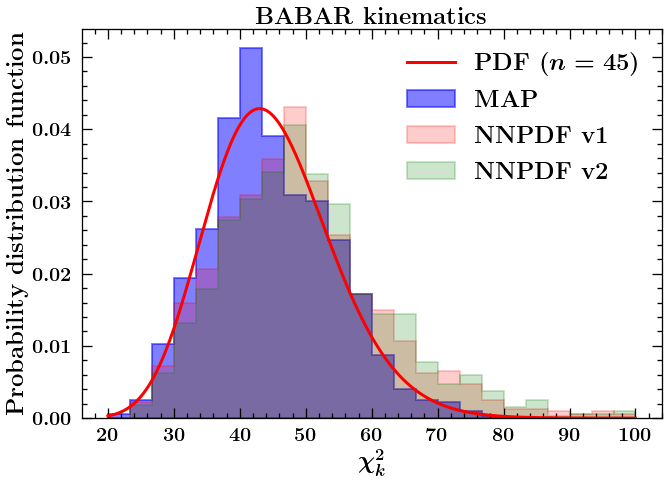

In [69]:
bmin = 20
bmax = 100
bnum = 25
bins = np.linspace(bmin, bmax, bnum)
weights = [bnum / ( nrep * ( bmax - bmin ) ) for i in range(nrep)]

plt.title(r"\textbf{BABAR kinematics}")
plt.ylabel(r"$\textbf{Probability distribution function}$")
plt.xlabel(r"\textbf{$\chi^2_k$}")
plt.hist(chi2map, bins = bins, weights = weights, histtype = "stepfilled", edgecolor = "blue",  linewidth = 2, alpha = 0.5, color = "blue", label = r"\textbf{MAP}")
plt.hist(chi2nn1, bins = bins, weights = weights, histtype = "stepfilled", edgecolor = "red",   linewidth = 2, alpha = 0.2, color = "red",  label = r"\textbf{NNPDF v1}")
plt.hist(chi2nn2, bins = bins, weights = weights, histtype = "stepfilled", edgecolor = "green", linewidth = 2, alpha = 0.2, color = "green",  label = r"\textbf{NNPDF v2}")

x = np.linspace(20, 100, 1000)
plt.plot(x, chi2pdf(45, x), color = "red", ls = "-", label = r"\textbf{PDF $(n = " + str(int(ndata)) + ")$}")
plt.legend()
plt.savefig("Chi2Dist.pdf")